In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2
from PIL import Image

import pyClientRLagentPytorch
import utils

In [2]:
def state_to_phosphenes(raw_state, sigma, threshold_high, threshold_low, phosphene_resolution, jitter, intensity_var, aperture, sigma_phosphenes):
    image_array = environment.state2usableArray(raw_state)
    ksize = 11 #np.round(4*sigma+1).astype(int) # rule of thumb: choose k_size>3*sigma
    blurred = cv2.GaussianBlur(image_array,(ksize,ksize),sigma)
    canny = cv2.Canny(blurred,threshold_low,threshold_high)
    simulator = utils.phosphene_simulator(phosphene_resolution, (screen_height, screen_width),jitter, intensity_var, aperture, sigma_phosphenes)    
    phosphenes = simulator(activation_mask=canny)
    return image_array, blurred, canny, phosphenes

In [3]:
# Unity environment
ip         = "127.0.0.1" # Ip address that the TCP/IP interface listens to
port       = 13000       # Port number that the TCP/IP interface listens to
timescale  = 1           # update step scale for unity
size = 128
screen_height = screen_width = size

environment = pyClientRLagentPytorch.Environment(ip = ip, port = port, size = size, timescale = timescale) 


In [4]:
end, reward, state_raw = environment.reset()

In [5]:
environment.step(0)
print("step")

step


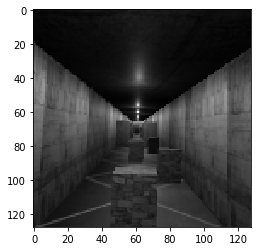

(128, 128)
[[20 20 19 ... 20 21 21]
 [17 16 15 ... 20 18 19]
 [13 13 12 ... 19 20 21]
 ...
 [32 33 43 ... 49 49 53]
 [32 31 43 ... 45 48 52]
 [32 33 67 ... 41 47 50]]
[[[24 21 17]
  [25 21 17]
  [24 20 16]
  ...
  [24 21 17]
  [25 22 18]
  [25 22 19]]

 [[21 18 14]
  [21 17 13]
  [20 16 12]
  ...
  [23 21 17]
  [22 19 15]
  [23 20 17]]

 [[17 14 10]
  [17 13 10]
  [16 13  9]
  ...
  [23 20 17]
  [23 21 18]
  [24 21 19]]

 ...

 [[35 33 29]
  [36 34 31]
  [44 43 42]
  ...
  [51 49 47]
  [50 50 47]
  [55 54 51]]

 [[35 33 28]
  [34 32 28]
  [44 43 42]
  ...
  [47 45 43]
  [49 49 46]
  [53 53 50]]

 [[36 33 29]
  [37 34 31]
  [77 68 62]
  ...
  [44 42 38]
  [48 47 45]
  [52 51 48]]]


In [6]:
image_array = environment.state2usableArray(state_raw)
grey = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
plt.imshow(grey,cmap='gray')
plt.show()
print(grey.shape)
print(grey)
print(image_array)

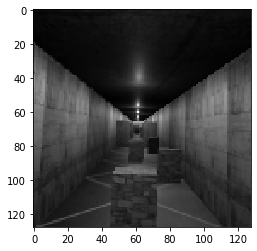

(128, 128)


In [7]:
image = environment.state2image(state_raw)
grey_pil = image.convert('L')
plt.imshow(grey_pil,cmap='gray')
plt.show()
print(grey_pil.size)

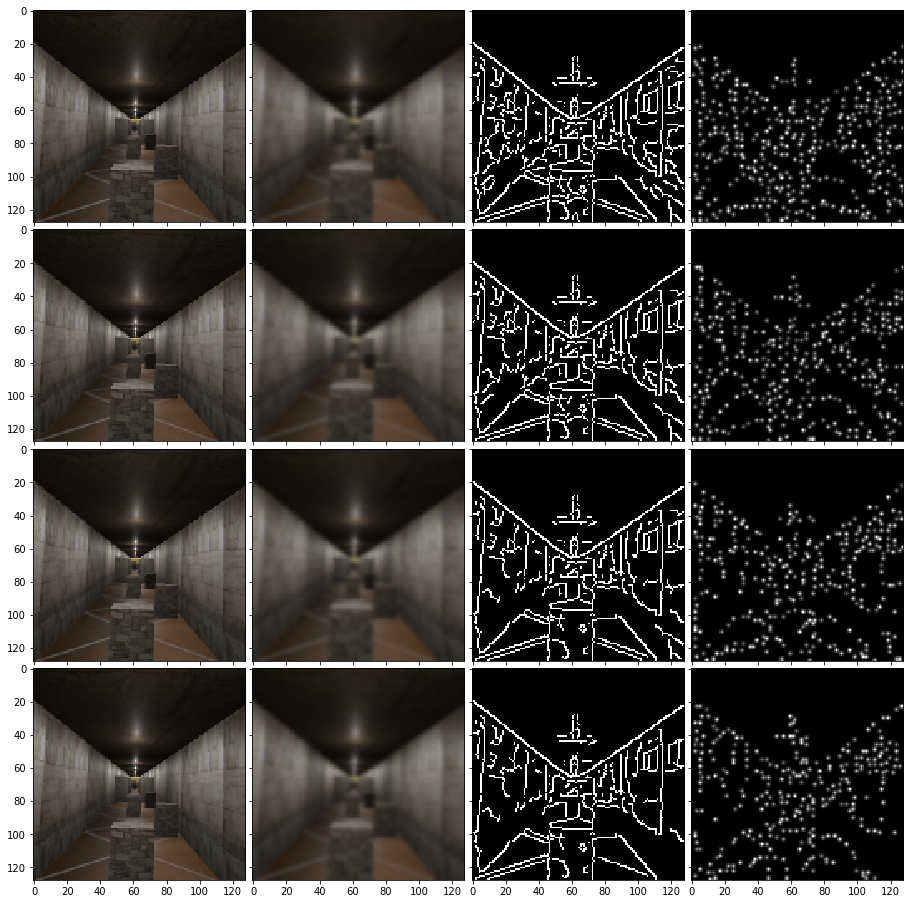

In [8]:
#test for different parameters

#parameters 0
SIGMA = 1.2 #3 original
threshold_high = 40 #40 original
threshold_low = int(0.5 * threshold_high)
phosphene_resolution= (32,32)
jitter = 0.35
intensity_var=0.8
aperture=0.66
sigma_phosphenes=0.8

orig0, blur0, cann0, phos0= state_to_phosphenes(state_raw, SIGMA, threshold_high, threshold_low, phosphene_resolution, jitter, intensity_var, aperture, sigma_phosphenes)

#parameters 1
SIGMA = 1.2 #3 original
threshold_high = 45 #40 original
threshold_low = int(0.5 * threshold_high)
phosphene_resolution= (32,32)
jitter = 0.35
intensity_var=0.8
aperture=0.66
sigma_phosphenes=0.8

orig1, blur1, cann1, phos1= state_to_phosphenes(state_raw, SIGMA, threshold_high, threshold_low, phosphene_resolution, jitter, intensity_var, aperture, sigma_phosphenes)

#parameters 2
SIGMA = 1.2 #3 original
threshold_high = 50 #40 original
threshold_low = int(0.5 * threshold_high)
phosphene_resolution= (32,32)
jitter = 0.35
intensity_var=0.8
aperture=0.66
sigma_phosphenes=0.8

orig2, blur2, cann2, phos2= state_to_phosphenes(state_raw, SIGMA, threshold_high, threshold_low, phosphene_resolution, jitter, intensity_var, aperture, sigma_phosphenes)

#parameters 3
SIGMA = 1.2 #3 original
threshold_high = 55 #40 original
threshold_low = int(0.5 * threshold_high)
phosphene_resolution= (32,32)
jitter = 0.35
intensity_var=0.8
aperture=0.66
sigma_phosphenes=0.8

orig3, blur3, cann3, phos3= state_to_phosphenes(state_raw, SIGMA, threshold_high, threshold_low, phosphene_resolution, jitter, intensity_var, aperture, sigma_phosphenes)


fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [orig0, blur0, cann0, phos0, orig1, blur1, cann1, phos1, orig2, blur2, cann2, phos2, orig3, blur3, cann3, phos3]):
    # Iterating over the grid returns the Axes.
    if(im.shape == (128, 128)):
        ax.imshow(im, cmap='gray')
    else:
        ax.imshow(im)

plt.show()

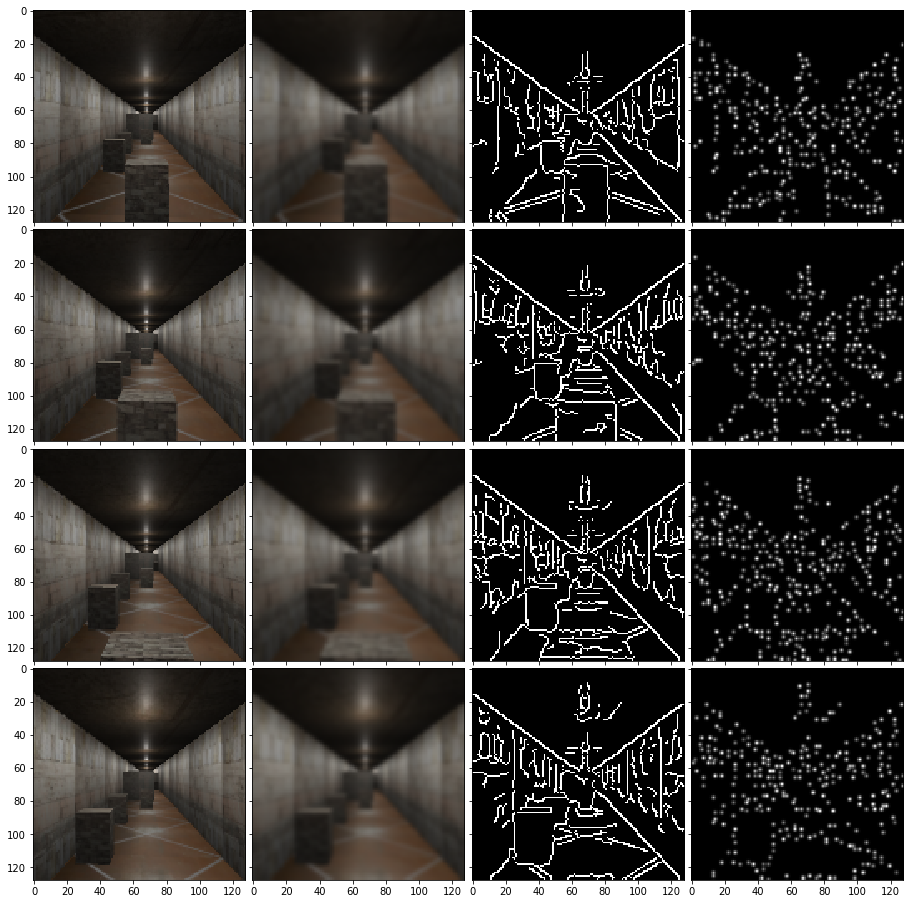

In [11]:
#test for first 4 frames
end, reward, state_raw = environment.reset()

#parameters 
SIGMA = 1.2 #3 original
threshold_high = 50 #40 original
threshold_low = int(0.5 * threshold_high)
phosphene_resolution= (32,32)
jitter = 0.35
intensity_var=0.8
aperture=0.66
sigma_phosphenes=0.8

orig0, blur0, cann0, phos0= state_to_phosphenes(state_raw, SIGMA, threshold_high, threshold_low, phosphene_resolution, jitter, intensity_var, aperture, sigma_phosphenes)

end, reward, state_raw = environment.step(0)

orig1, blur1, cann1, phos1= state_to_phosphenes(state_raw, SIGMA, threshold_high, threshold_low, phosphene_resolution, jitter, intensity_var, aperture, sigma_phosphenes)

end, reward, state_raw = environment.step(0)

orig2, blur2, cann2, phos2= state_to_phosphenes(state_raw, SIGMA, threshold_high, threshold_low, phosphene_resolution, jitter, intensity_var, aperture, sigma_phosphenes)

end, reward, state_raw = environment.step(0)

orig3, blur3, cann3, phos3= state_to_phosphenes(state_raw, SIGMA, threshold_high, threshold_low, phosphene_resolution, jitter, intensity_var, aperture, sigma_phosphenes)


fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [orig0, blur0, cann0, phos0, orig1, blur1, cann1, phos1, orig2, blur2, cann2, phos2, orig3, blur3, cann3, phos3]):
    # Iterating over the grid returns the Axes.
    if(im.shape == (128, 128)):
        ax.imshow(im, cmap='gray')
    else:
        ax.imshow(im)

plt.show()

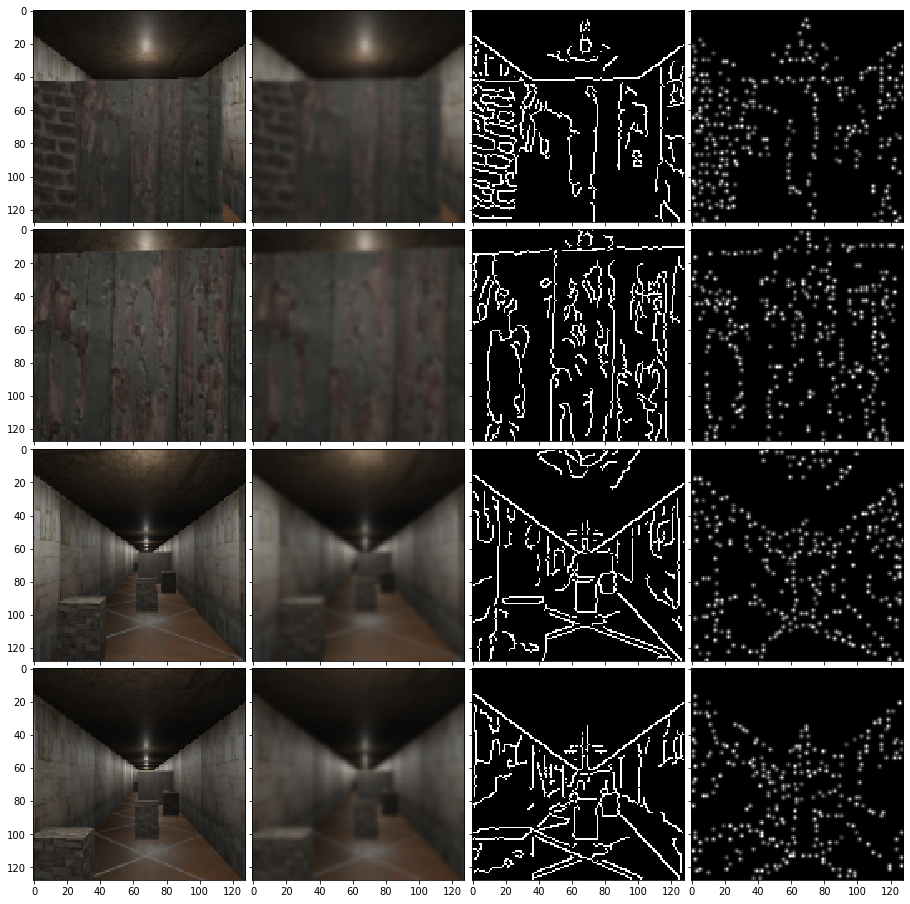

In [17]:
#test for first 4 frames
#end, reward, state_raw = environment.reset()

#parameters 
SIGMA = 1.2 #3 original
threshold_high = 50 #40 original
threshold_low = int(0.5 * threshold_high)
phosphene_resolution= (32,32)
jitter = 0.35
intensity_var=0.8
aperture=0.66
sigma_phosphenes=0.8

orig0, blur0, cann0, phos0= state_to_phosphenes(state_raw, SIGMA, threshold_high, threshold_low, phosphene_resolution, jitter, intensity_var, aperture, sigma_phosphenes)

end, reward, state_raw = environment.step(0)

orig1, blur1, cann1, phos1= state_to_phosphenes(state_raw, SIGMA, threshold_high, threshold_low, phosphene_resolution, jitter, intensity_var, aperture, sigma_phosphenes)

end, reward, state_raw = environment.step(0)

orig2, blur2, cann2, phos2= state_to_phosphenes(state_raw, SIGMA, threshold_high, threshold_low, phosphene_resolution, jitter, intensity_var, aperture, sigma_phosphenes)

end, reward, state_raw = environment.step(0)

orig3, blur3, cann3, phos3= state_to_phosphenes(state_raw, SIGMA, threshold_high, threshold_low, phosphene_resolution, jitter, intensity_var, aperture, sigma_phosphenes)


fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [orig0, blur0, cann0, phos0, orig1, blur1, cann1, phos1, orig2, blur2, cann2, phos2, orig3, blur3, cann3, phos3]):
    # Iterating over the grid returns the Axes.
    if(im.shape == (128, 128)):
        ax.imshow(im, cmap='gray')
    else:
        ax.imshow(im)

plt.show()